### Dalton Harris
### GIS 490 Assignment 4
### Winter 2023

In [24]:
# Import libraries
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt

## Task 1

In [25]:
#open 2001 phoenix data via rasterio
#src = source
#rasterio is used for the source data
src = rasterio.open('C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Assignment_4/Assignment_4_data/nlcd_2001_phoenix.tif')

In [26]:
src

<open DatasetReader name='C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Assignment_4/Assignment_4_data/nlcd_2001_phoenix.tif' mode='r'>

In [27]:
print(f"Number of bands: {src.count}")
print(f"Width: {src.width}")
print(f"Height: {src.height}")
print(f"Data type: {src.dtypes}")

Number of bands: 1
Width: 8176
Height: 5343
Data type: ('uint8',)


#### a) How many rows and columns are there in the nlcd_2001_phoenix.tif GeoTIFF?

#### Rows = 5343, Columns = 8176

#### b) List the northernmost, southernmost, eastermost, and westernmost coordinates of the dataset.

In [28]:
#src coordinate reference system
src.crs
#Albers = meter

CRS.from_wkt('PROJCS["Albers Conical Equal Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [29]:
#spatial res and top left coordinate
src.transform
#30m res

Affine(30.000762373473098, 0.0, -1589209.731401832,
       0.0, -29.999261343006733, 1331490.51999102)

In [30]:
#bounding box
src.bounds

BoundingBox(left=-1589209.731401832, bottom=1171204.466635335, right=-1343923.498236316, top=1331490.51999102)

#### norhternmost: 1331490.51999102 (top), southernmost: 1171204.466635335 (bottom), eastermost: -1343923.498236316 (right), westernmost: -1589209.731401832 (left)

#### c) Plot the land cover data for 2001 using qualitative colormap of your choice.

In [31]:
#convert data to NumPy
phoenix_2001 = src.read(1)

In [32]:
phoenix_2001

array([[52, 52, 52, ..., 42, 42, 42],
       [52, 52, 52, ..., 42, 42, 42],
       [52, 52, 52, ..., 42, 42, 42],
       ...,
       [52, 52, 52, ..., 52, 52, 52],
       [52, 52, 52, ..., 52, 52, 52],
       [52, 52, 52, ..., 52, 52, 52]], dtype=uint8)

In [33]:
type(phoenix_2001)

numpy.ndarray

Text(0.5, 1.0, 'Phoenix land cover')

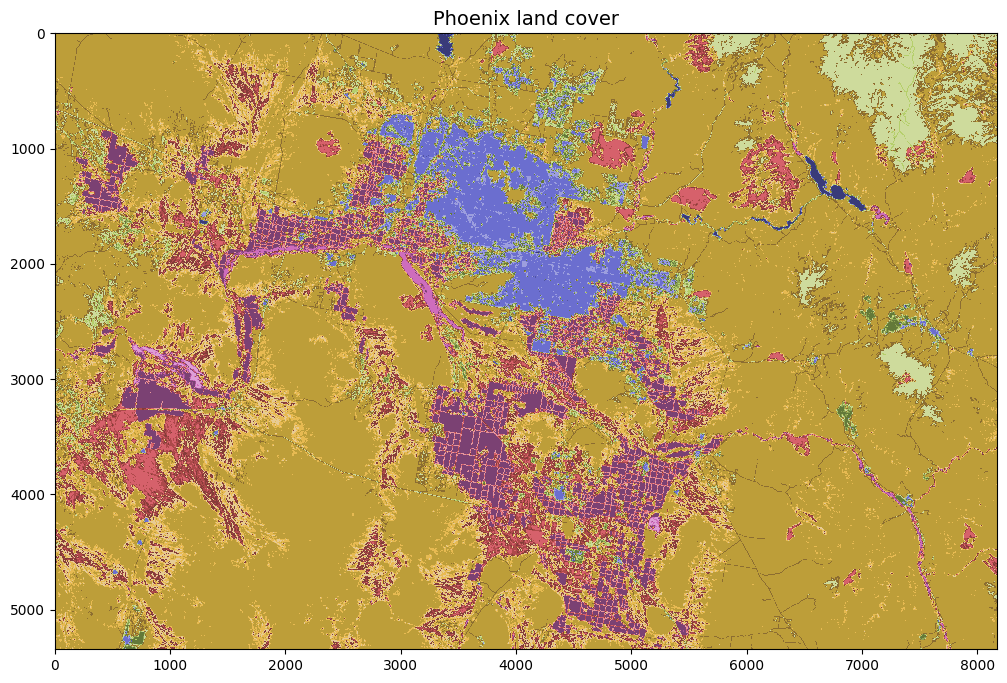

In [39]:
#plot the data
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(phoenix_2001, cmap='tab20b')
ax.set_title("Phoenix land cover", fontsize=14)

#### d) Identify the land cover classes of three random grid cells. The following table is provided as a reference.

In [40]:
#cells are [Y,X]
#Random Cell 1
phoenix_2001[4599, 5595]

52

In [41]:
#Random Cell 2
phoenix_2001[4088, 7289]

52

In [42]:
#Random Cell 3
phoenix_2001[2575, 5873]

52

#### All three random cells were 52 (shrub/scrub)

In [43]:
#non-Random Cell 1 (towards city center)
phoenix_2001[4000, 4000]
#cultivated crops

82

In [81]:
#non-Random Cell 1 (towards city center)
phoenix_2001[1400, 5500]
#aiming for light pink developed

71

In [84]:
#non-Random Cell 1 (towards city center)
phoenix_2001[3800, 1400]
#aiming for water

52

Text(0.5, 1.0, 'phoenix land cover')

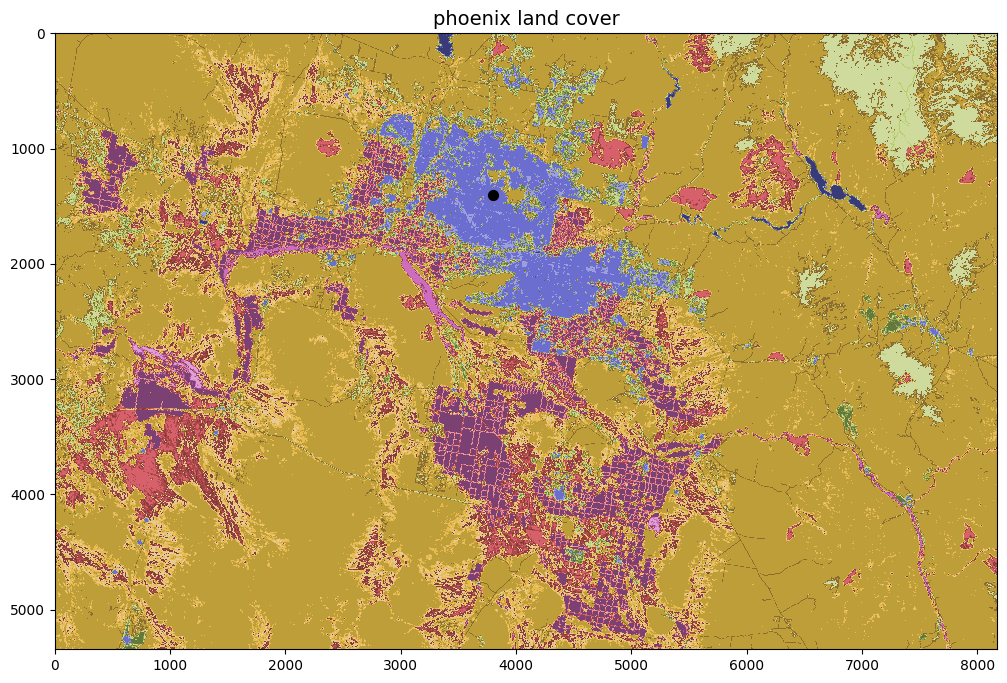

In [83]:
#Cells are [X, Y]
#puting a dot on the scatterplot at select locations
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(phoenix_2001, cmap='tab20b')
ax.scatter(3800, 1400, s=50, color='k')
ax.set_title("phoenix land cover", fontsize=14)

#### e) How many grid cells are classified as Developed, High Intensity, Cultivated Crops, and Open Water?

In [86]:
# using the unique() function to count the occurrence of each land cover class
unique, phoenix_2001_counts = np.unique(phoenix_2001, return_counts=True)
dict(zip(unique, phoenix_2001_counts))


{11: 143014,
 21: 919466,
 22: 809417,
 23: 953533,
 24: 322422,
 31: 706318,
 42: 1497913,
 43: 1603,
 52: 30851488,
 71: 4039637,
 81: 41732,
 82: 3046041,
 90: 289378,
 95: 62406}

In [87]:
# Count number of land pixels
phoenix_2001_land_pixels = phoenix_2001.size

In [88]:
# Convert to DataFrame
df_phoenix_2001 = pd.DataFrame(list(zip(unique, counts, (phoenix_2001_counts/phoenix_2001_land_pixels)*100)), 
                       columns=['lc', 'count_2001', 'fraction_2001'])

In [89]:
df_phoenix_2001

,lc,count_2001,fraction_2001
0,11,143014,0.327380
1,21,919466,2.104794
2,22,809417,1.852876
3,23,953533,2.182779
4,24,322422,0.738072
5,31,706318,1.616867
6,42,1497913,3.428945
7,43,1603,0.003670
8,52,30851488,70.623634
9,71,4039637,9.247328


In [ ]:
#Land cover classification legend
#Developed (open, low, med, high)= 21,22,23,24
#Developed, High Intensity = 24
#Cultivated Crops = 82
#Open Water = 11

In [91]:
# Developed (open, low, med, high)= 21,22,23,24
919466 + 809417 + 809417 + 322422

2860722

#### Developed = 2860722
#### Developed, High Intensity = 322422
#### Cultivated Crops = 3046041
#### Open Water = 143014

## Task 2

#### a) How many different land cover classes are there in the 2001 data?

#### 14 different land cover classes

#### b) Aggregate all developed land cover classes (i.e. 21, 22, 23, and 24) into a single class. Bonus point if you can write it as a one-liner.

In [ ]:
# Re-assign land cover class (aka converge multiple classes into one)
#phoenix_2001[phoenix_2001 == 52] = 51

## Testing 

In [113]:
phoenix_2001_test = src.read(1)

In [107]:
phoenix_2001_test[phoenix_2001_test == (21, 22, 23, 24, 52)] = 11

for i in phoenix_2001_test

IndexError: too many indices for array: array is 2-dimensional, but 5 were indexed

In [118]:
phoenix_2001_test[phoenix_2001_test == 21, phoenix_2001_test == 52] = 11

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [116]:
phoenix_2001_test[phoenix_2001_test(52)] = 11

TypeError: 'numpy.ndarray' object is not callable

Text(0.5, 1.0, 'Phoenix land cover')

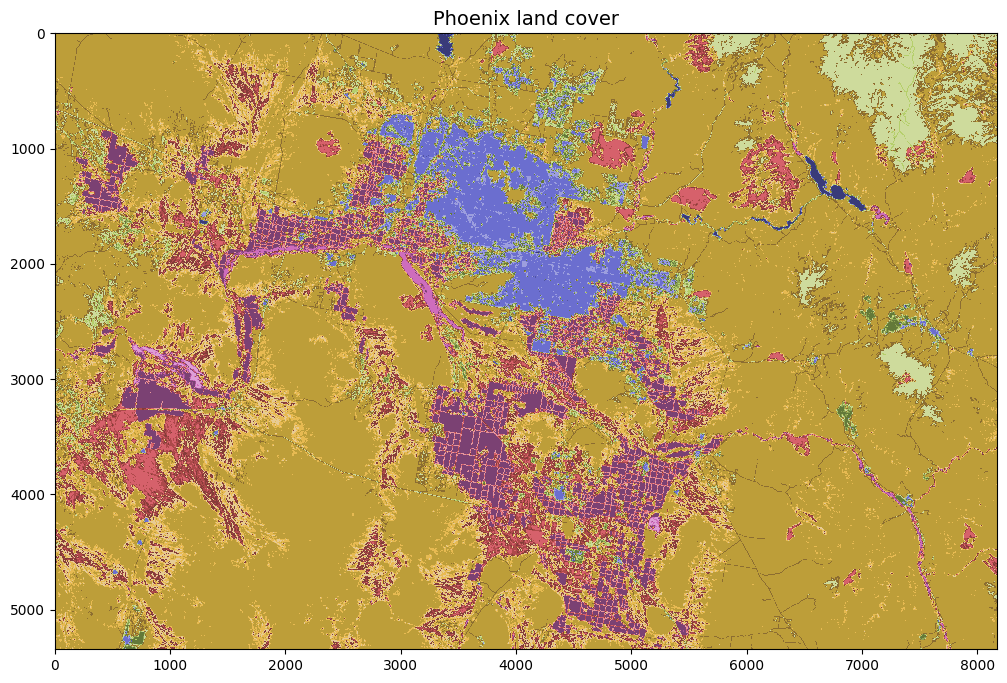

In [114]:
#plot the data
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(phoenix_2001_test, cmap='tab20b')
ax.set_title("Phoenix land cover", fontsize=14)

## Testing end

In [121]:
# Re-assign land cover class (aka converge multiple classes into one)
# converting land classes 21, 22, 23 to land class 24
phoenix_2001[phoenix_2001 == 21] = 24
phoenix_2001[phoenix_2001 == 22] = 24
phoenix_2001[phoenix_2001 == 23] = 24


In [126]:
# using the unique() function to count the occurrence of each land cover class
unique, phoenix_2001_counts = np.unique(phoenix_2001, return_counts=True)
dict(zip(unique, phoenix_2001_counts))

{11: 143014,
 24: 3004838,
 31: 706318,
 42: 1497913,
 43: 1603,
 52: 30851488,
 71: 4039637,
 81: 41732,
 82: 3046041,
 90: 289378,
 95: 62406}

In [127]:
# Convert to DataFrame
df_phoenix_2001 = pd.DataFrame(list(zip(unique, counts, (phoenix_2001_counts/phoenix_2001_land_pixels)*100)), 
                       columns=['lc', 'count_2001', 'fraction_2001'])

In [128]:
df_phoenix_2001

,lc,count_2001,fraction_2001
0,11,143014,0.327380
1,24,919466,6.878520
2,31,809417,1.616867
3,42,953533,3.428945
4,43,322422,0.003670
5,52,706318,70.623634
6,71,1497913,9.247328
7,81,1603,0.095531
8,82,30851488,6.972840
9,90,4039637,0.662429


#### c) What percentage of the 2001 data is occupied by this new developed class?

#### 6.878520% of the the 2001 data is occupied by this new developed class (class 24)

#### d) What percentage of the 2001 data is occupied by open water?



#### 0.327380% of the the 2001 data is occupied by open water (class 11)

#### e) Which is the most common land cover class in the 2001 data (as a percentage)?

#### the most common land cover class is Shrub/scrub (Class 52) at 70.623634%

## Task 3

#### a) Import the nlcd_2019_phoenix.tif GeoTIFF and aggregate all developed land cover classes (i.e. 21, 22, 23, and 24) into a single class.